<a href="https://colab.research.google.com/github/RT-86/FoodHub-Data-Analysis/blob/main/FoodHub_Project_Aarthy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 32.2 MB/s eta 0:00:00


In [ ]:
!pip install nbconvert

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark')


### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Python'

/content/drive/MyDrive/Python


In [ ]:
# code to read the data
df=pd.read_csv('/content/drive/MyDrive/Python/foodhub_order.csv')

In [ ]:
# code to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
df.shape

(1898, 9)

**Observations:**

The dataframe has 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


**Observations:**



*   There are 3 different datatypes based on the columns values. (int64, float64, object)
*   There are no missing values for all column.(i.e  Non-Null Count is 1898
)



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
#code to find missing values in data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

**Observations:**

There are no missing values in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# code to check the statistical summary of the data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


**Observations:**



---


*   Cost of an order ranges from 4.47 to 35.41 dollars, with a average of 16 and standard deviation of 7.48 dollars.
*   Food preperation times range from 20 to 35 minutes, with an average of 27.37 and standard deviation of 4.63 minutes.
*   Delivery times range from 15 to 33 minutes, average of 24.16 minutes and standard deviation of 4.97 minutes.




### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# code to find count of orders not rated
df['rating'].value_counts(normalize=False)

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [ ]:
# code to find %orders not rated
df['rating'].value_counts(normalize=True)*100

rating
Not given    38.777661
5            30.979979
4            20.337197
3             9.905163
Name: proportion, dtype: float64

**Observations:**


736(38.77%) orders do not have a rating.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
# code for unique counts
df.nunique()

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

**Observations:**

*   1898 orders are placed overall by 1200 unique customers.
*   There are 14 unique cuisine types and 178 unique restaurants.



In [ ]:
#Code to find Percentage of customers who ordered only once
df.groupby('customer_id')['order_id'].nunique().value_counts(normalize=True)*100

order_id
1     65.333333
2     22.250000
3      6.916667
4      2.750000
5      1.583333
6      0.500000
7      0.333333
10     0.083333
13     0.083333
9      0.083333
8      0.083333
Name: proportion, dtype: float64

**Observations:**

65% of the customers ordered only one time.

In [ ]:
# code to display unique values for cuisine_type
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

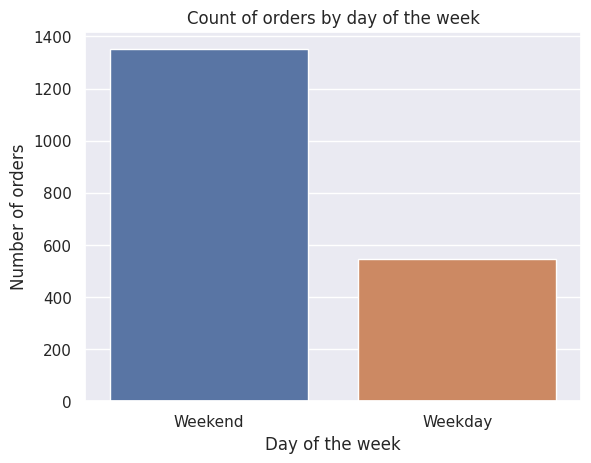

In [ ]:
#code to dispaly count of orders by day of the week the order was placed
sns.set(style='darkgrid')
sns.countplot(data=df,x='day_of_the_week',hue='day_of_the_week') #added hue for having different colors for the values)
plt.title('Count of orders by day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Number of orders')
plt.show()

**Observations:**

The total number of order are high during weekends.
Weekend count is ~1300
Weekday count is ~550

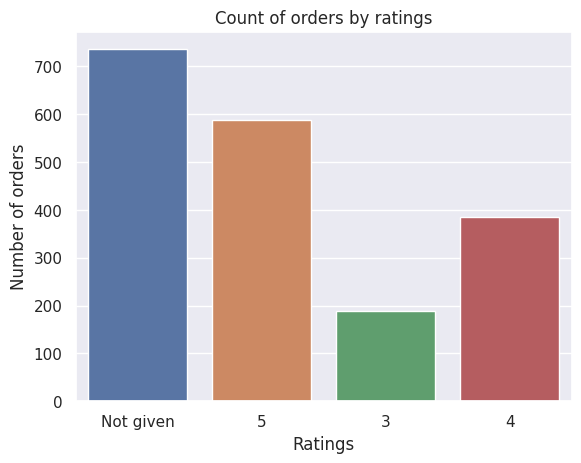

In [ ]:
#code to dispaly count of orders by ratings
sns.countplot(data=df,x='rating',hue='rating') #added hue for having different colors for the values)
plt.title('Count of orders by ratings')
plt.xlabel('Ratings')
plt.ylabel('Number of orders')
plt.show()

**Observations:**

The number of orders without any rating is highest (>700 orders).
The number of order with rating 3 is lowest (~200)


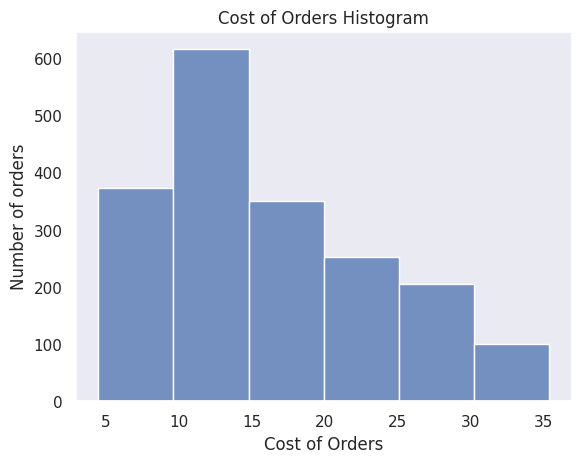

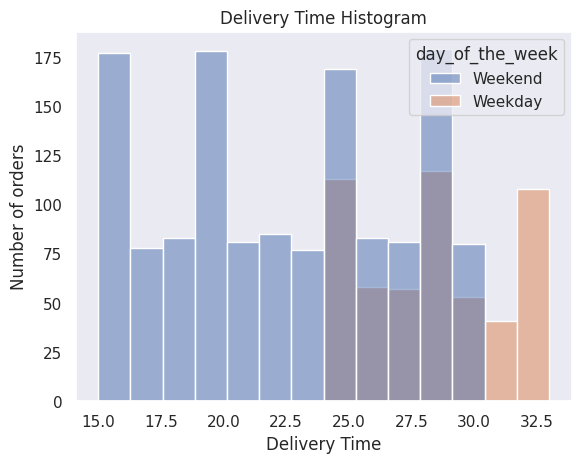

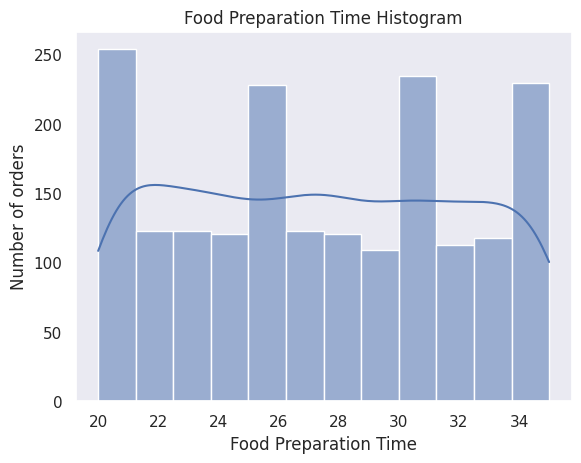

In [ ]:
# code for plotting histogram for the costs of all orders /Delivery Time / Food PreparationT ime
sns.histplot(data=df, x='cost_of_the_order', binwidth=5)
plt.title('Cost of Orders Histogram')
plt.xlabel('Cost of Orders')
plt.ylabel('Number of orders')
plt.show()

print('\n')
sns.histplot(data=df, x='delivery_time',hue='day_of_the_week')
plt.title('Delivery Time Histogram')
plt.xlabel('Delivery Time')
plt.ylabel('Number of orders')
plt.show()

print('\n')
sns.histplot(data=df, x='food_preparation_time',kde='hex')
plt.title('Food Preparation Time Histogram')
plt.xlabel('Food Preparation Time')
plt.ylabel('Number of orders')
plt.show()

**Observations:**
*   Cost of the orders ranges from 4.5 to 35.2 dollars.Most of the order are between 10-15 dollars.It is slightly right skewed.
*   Delivery time ranges from 15 minutes to 33 minutes. Distribution does not have a well defined bell curve with mutiple peaks and valleys.
*   Food preparation ranges from of 20 minutes to 35 minutes. Distribution does not have a well defined bell curve with mutiple peaks and valleys.








In [ ]:
df['delivery_time'].median()

25.0

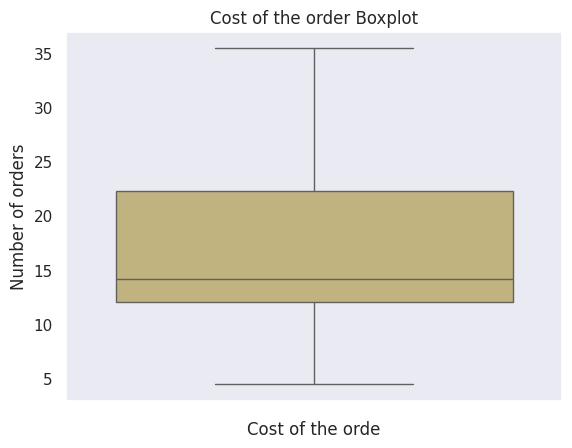

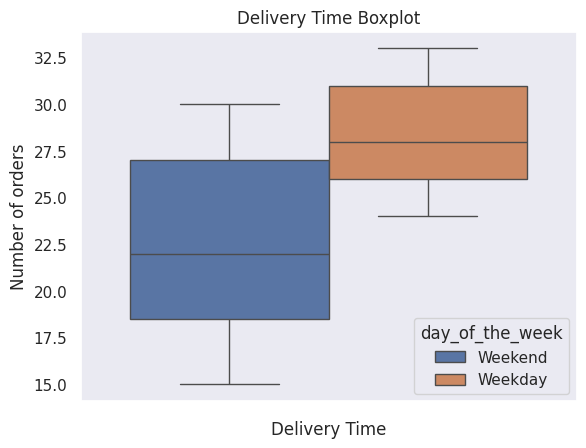

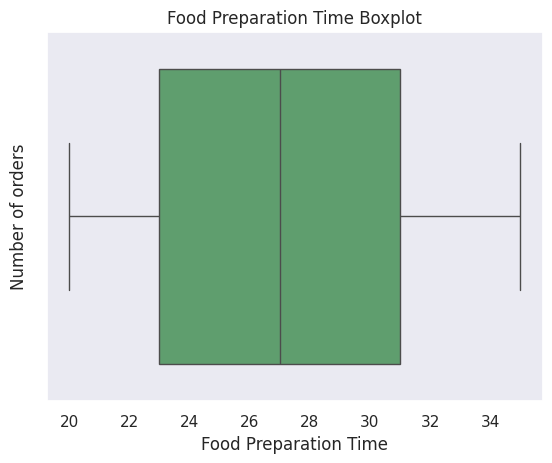

In [ ]:
# code for plotting boxplot for the food preparation time
sns.set(style='dark')
sns.boxplot(data=df, y='cost_of_the_order',color='y')
plt.title('Cost of the order Boxplot')
plt.xlabel('Cost of the orde')
plt.ylabel('Number of orders')
plt.show()

print('\n')
sns.boxplot(data=df, y='delivery_time',hue='day_of_the_week')
plt.title('Delivery Time Boxplot')
plt.xlabel('Delivery Time')
plt.ylabel('Number of orders')
plt.show()

print('\n')
sns.boxplot(data=df, x='food_preparation_time',color='g')
plt.title('Food Preparation Time Boxplot')
plt.xlabel('Food Preparation Time')
plt.ylabel('Number of orders')
plt.show()

**Observations:**



*   Median of cost of the order os is time is ~14 dollars. 75% of the orders cost below 24 dollars.

*   Median delivery time for weekend is ~22 minutes and weekday ~28 minutes. 75% of food delivered during weekend is below 27 dollars. And 50% of the food delivered during weekdays are above 27.5 dollars.

*  Median is time is 27 minutes. 50% of the food is prepared in 27 minutes and 75% of food is prepared in 31 minutes.






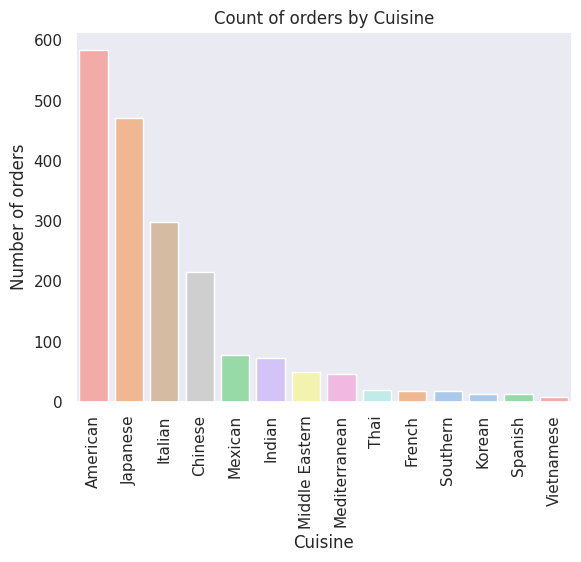

In [ ]:
# code to display order count per Cuisine
sns.countplot(data=df,x='cuisine_type',hue='cuisine_type',palette='pastel', order=df['cuisine_type'].value_counts().index)
plt.title('Count of orders by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Number of orders')
plt.xticks(rotation=90)
plt.show()

The top cuisine type by number of orders is American with over 550 orders placed. Next is Japanese. Followed by Japanese and Italian.

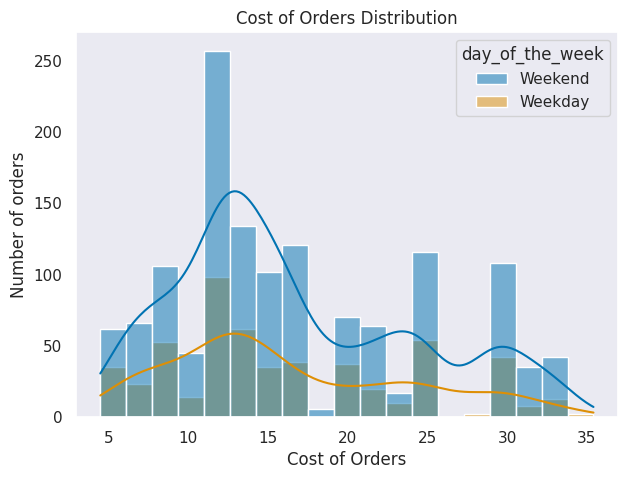

In [ ]:
# code to display order count per Cuisine
plt.figure(figsize = (7,5))
sns.histplot(data = df, x = 'cost_of_the_order', kde = True, hue='day_of_the_week',palette='colorblind')
plt.title('Cost of Orders Distribution')
plt.xlabel('Cost of Orders')
plt.ylabel('Number of orders')
plt.show()

**Observations:**
*   Most of the order cost 11-12 dollars.Cost of the orders during weekend is higher than the weekday.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Code for Top 5 restaurants
df['restaurant_name'].value_counts().head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

**Observations:**

Shake Shack is the most popular restaurant by orders received.

Second is The Meatball Shop

Third is Blue Ribbon Sushi

Fourth is Blue Ribbon Fried Chicken

Fifth is Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Code for most popular cuisine on weekends
df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().head(3)

cuisine_type
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: count, dtype: int64

**Observations:**

American is the most popular cuisine on weekends.




### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Code for Percentage of orders cost more than 200 dollars
round(len(df[df['cost_of_the_order']>20])/len(df)*100,2)

29.24

**Observations:**

29.2% percentage of the orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Code for mean delivery time
round(df['delivery_time'].mean(),2)

24.16

**Observations:**

26.16 is the mean order delivery time.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Code for Top 3 most frequent customers
df['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

**Observations:**

52832 is the top most customer with 13 orders.

Followed by 47440 with 10 orderd and 83287 with 9 orders.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
#Code to convert rating from string to integer to calculate average
df['rating_new']=df['rating'].replace('Not given',0)
df['rating_new']=pd.to_numeric(df['rating_new'])
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_new
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,0
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,0
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4


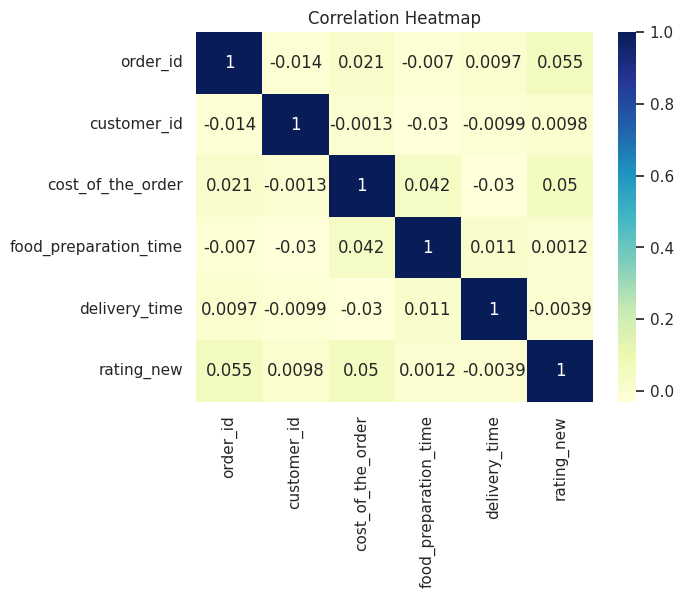

In [ ]:
#heatmap
df_corr = df[['order_id', 'customer_id','cost_of_the_order', 'food_preparation_time', 'delivery_time','rating_new']]
sns.heatmap(df_corr.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

**Observations:**

The Correlation heat map shows that the dataset shows no significant correlations between any of the variables.

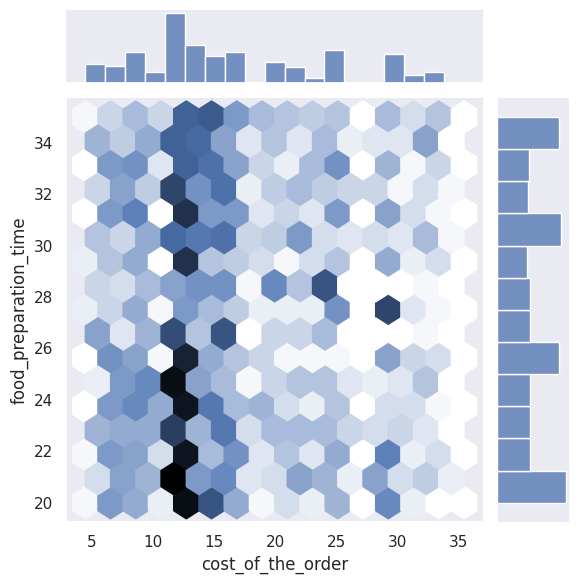

In [ ]:
#jointplot
sns.jointplot(data=df, x='cost_of_the_order', y='food_preparation_time',kind='hex')

**Observations:**

Food preparation time has multiple peaks. Around 20 to 22, 24 to 26 and 32-34
is also slighltly dense.

Cost of the order is dense around 10-15 minutes.

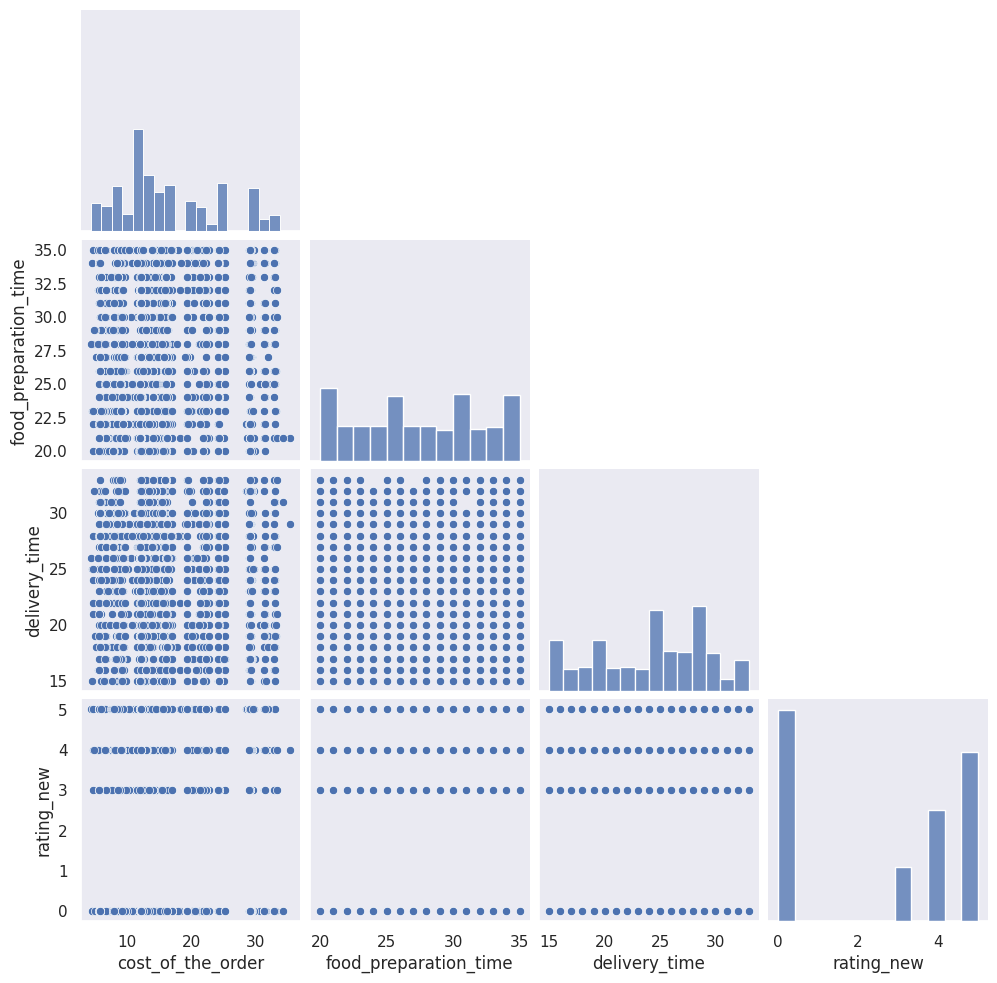

In [ ]:
# pairplot
sns.pairplot(data=df[['cost_of_the_order', 'food_preparation_time', 'delivery_time','rating_new']],  corner=True);

**Observations:**

The pairplot does not show any strong correlation between 2 variables in the dataset.

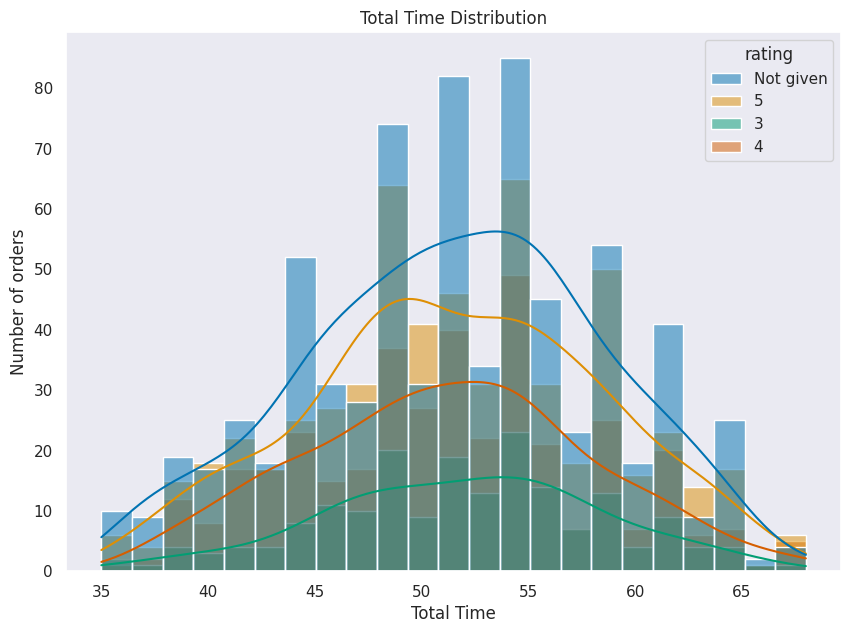

In [ ]:
#histogram for total time and no of orders
plt.figure(figsize = (10,7))
df['total_time']=df['food_preparation_time']+df['delivery_time']
df.head()
sns.histplot(data = df, x = 'total_time', hue = 'rating', kde = True,palette='colorblind')
plt.title('Total Time Distribution')
plt.xlabel('Total Time')
plt.ylabel('Number of orders')
plt.show()

**Observations**

*   Total time distribution is almost like a normal distribution.



In [ ]:
#catplot for analyzing cuisine type
print('\n')
plt.figure(figsize = (15,7))
sns.catplot(data = df, x = 'cuisine_type', y = 'food_preparation_time', kind='point')
plt.title('Food Prepration Time by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Food Prepration Time')
plt.xticks(rotation=90)
plt.show()

print('\n')
plt.figure(figsize = (15,7))
sns.catplot(data = df, x = 'cuisine_type', y = 'delivery_time', kind='box',hue='day_of_the_week')
plt.title('Delivery Time by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Delivery Time')
plt.xticks(rotation=90)
plt.show()

print('\n')
plt.figure(figsize = (15,7))
sns.catplot(data = df, x = 'cuisine_type', y = 'cost_of_the_order', kind='bar')
plt.title('Cost of the Order by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Cost of the order')
plt.xticks(rotation=90)
plt.show()



NameError: name 'plt' is not defined

**Observation:**

*   All the cuisine types have almost same average cost/ delivery time / food preparation time but differnt confidence interval and IQR range.
*   Delivery Time is high during weekdays for all cuisines.


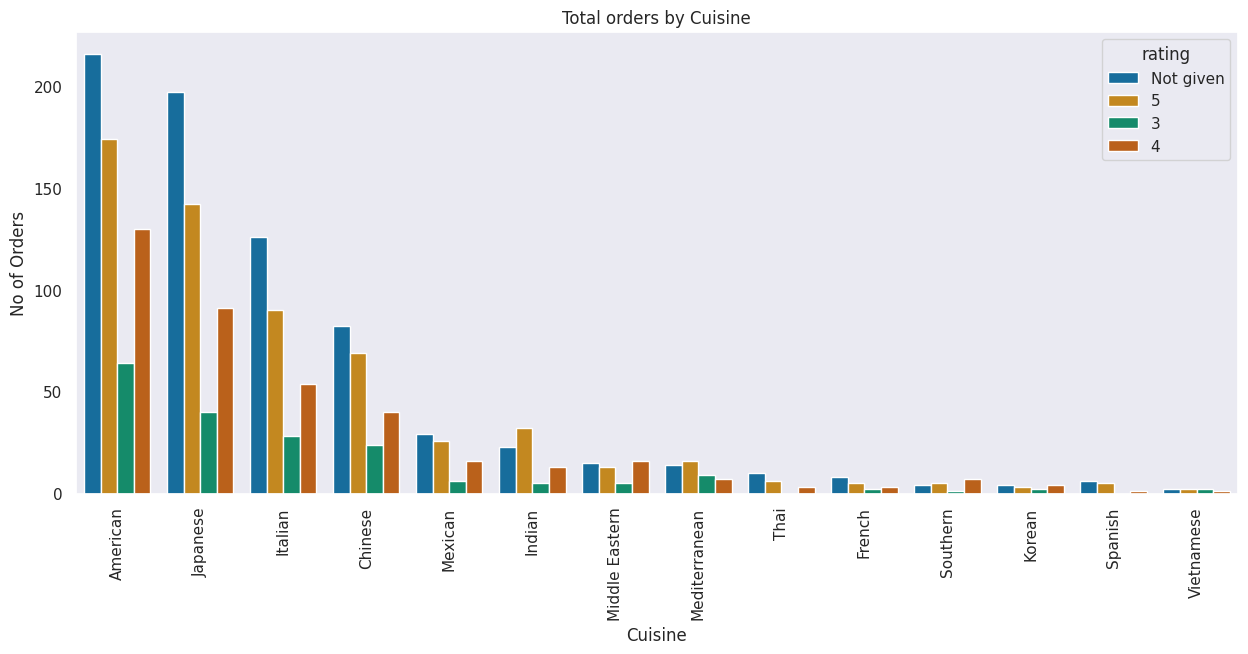

In [ ]:
#countplot for Cuisine Type by no of orders by Rating
plt.subplots(figsize=(15,6))
sns.countplot(data = df, x = 'cuisine_type', hue = 'rating',palette='colorblind', order=df['cuisine_type'].value_counts().index)
plt.title('Total orders by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('No of Orders')
plt.xticks(rotation=90)
plt.show()

**Observation**

American, Japanese, Italian, Chinese  and Mexican are the top 4 highly rated Cuisines.

**Observations**

Delivery Time is high during weekdays for all cuisines.

In [ ]:
# Function to calculate percentage
def percent_calc(a,b) :
    return (a*100)/(a+b)

In [ ]:
# Code to get % orders without rating
df_unrated=df[df['rating']=='Not given']['customer_id'].value_counts().sum()
df_rated=df[df['rating']!='Not given']['customer_id'].value_counts().sum()
percent_rate=percent_calc(df_unrated,df_rated)
print('Not Rated =',df_unrated,'Rated =',df_rated)
print('Percent not rated',round(percent_rate,2))


Not Rated = 736 Rated = 1162
Percent not rated 38.78


**Observations**

38.78% of the orders were not rated.

In [ ]:
#Code to get the % of orders placed during weekends
df_weekend=df[df['day_of_the_week']=='Weekend']['customer_id'].value_counts().sum()
df_weekday=df[df['day_of_the_week']=='Weekday']['customer_id'].value_counts().sum()
percent_weekend_visitors=percent_calc(df_weekend,df_weekday)
print('Weekend Visitors =',df_weekend,'Weekday Visitors =',df_weekday)
print('Percent Weekend Visitors',round(percent_weekend_visitors,2))

Weekend Visitors = 1351 Weekday Visitors = 547
Percent Weekend Visitors 71.18


**Observation**
71.18% orders during weekend.

In [ ]:
#Top 10 Restaurants by number of customers who placed the orders
df.groupby(df['restaurant_name'])['customer_id'].count().sort_values(ascending=False).head(10)


restaurant_name
Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: customer_id, dtype: int64

In [ ]:
#Top 10 Restaurants by Cost of the orders placed
df.groupby(df['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending=False).head(10)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Name: cost_of_the_order, dtype: float64

In [ ]:
#Top 10 Cuisine Type by Cost of the orders placed
df.groupby(df['cuisine_type'])['cost_of_the_order'].sum().sort_values(ascending=False).head(10)

cuisine_type
American          9530.78
Japanese          7663.13
Italian           4892.77
Chinese           3505.62
Mexican           1303.85
Indian            1235.14
Middle Eastern     922.21
Mediterranean      711.84
Thai               364.95
French             356.29
Name: cost_of_the_order, dtype: float64

In [ ]:
#Top 10 Cuisine Type by ratings
df.groupby(df['cuisine_type'])['rating_new'].mean().sort_values(ascending=False).head(10)

cuisine_type
Southern          3.294118
Indian            3.109589
Middle Eastern    2.938776
Mediterranean     2.934783
Vietnamese        2.857143
Korean            2.846154
Mexican           2.753247
American          2.708904
Chinese           2.683721
Japanese          2.540426
Name: rating_new, dtype: float64

In [ ]:
#Top 10 Cuisine Type by Delivery Time
df.groupby(df['cuisine_type'])['delivery_time'].mean().sort_values(ascending=False).head(10)

cuisine_type
Vietnamese        26.142857
French            25.333333
Italian           24.567114
Mexican           24.389610
American          24.193493
Japanese          24.131915
Indian            24.082192
Middle Eastern    24.081633
Chinese           23.855814
Southern          23.823529
Name: delivery_time, dtype: float64

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
#Code to covert rating from string to integer to calculate average
df['rating_new']=df['rating'].replace('Not given',0)
df['rating_new']=pd.to_numeric(df['rating_new'])
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_new
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,0
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,0
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4


In [ ]:
# code to eliminate restaurants without rating
df1 = df[df['rating_new']!= 0]
df1.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_new
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,3
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,3


In [ ]:
#code to create a data set of restaurants with rating greater than 4.
df2 = df1[['restaurant_name','rating_new']].groupby('restaurant_name').mean()> 4
df2.reset_index(inplace=True)
df2.head()
# code to create a data set of restaurants with count of rating greate than 50.
df3 = df[['restaurant_name','rating_new']][df['rating_new']!= 0].groupby('restaurant_name').count()> 50
df3.reset_index(inplace=True)
# code to create a set of restaurants that meet both conditions using merge
final_restaurant_list = pd.merge(df3[df3['rating_new']== True], df2[df2['rating_new']== True],on ='restaurant_name')
# Return the set of qualified restaurants only
final_restaurant_list['restaurant_name']


0    Blue Ribbon Fried Chicken
1            Blue Ribbon Sushi
2                  Shake Shack
3            The Meatball Shop
Name: restaurant_name, dtype: object

**Observations:**

Blue Ribbon Fried Chicken, Blue Ribbon Sushi,  Shake Shack, The Meatball Shop are the restarants eligible for promotional offer.



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
  revenue=0
  for i in df['cost_of_the_order']:
    if i>20:
      revenue=revenue+(i*0.25)
    elif i>5 and i<=20:
      revenue=revenue+(i*0.15)
    else:
      revenue=revenue+(i*0)
  print('Revenue:',round(revenue,2))


Revenue: 6166.3


**Observations:**
Revenue: 6166.3

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
df['total_time']=df['food_preparation_time']+df['delivery_time']
a=len((df[df.total_time>60]))
b=len(df)
percentage= round(a*100/b,2)
print('Percentage:',percentage,'%')

Percentage: 10.54 %


**Observations:**
Percentage: 10.54 % orders take more than 60 minutes to get delivered from the time the order is placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

**Observations:**
The average delivery time on weekdays is greater than during the weekend.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

**Conclusions:**

* Orders & Customers:
There are 1898 Orders placed through Foodhub App. There are 1200 unique customers ordering through the App
Out them, 784 (65%) customers have only placed single order. And 267 (22%) customers) have order twice through the App.

* Ratings:
For 736(38.8%) order there were no ratings given.
Out of the remaining population 30% gave rating 5, 20% gave rating 4, 9% gave rating 3

* Day of the week:
1351 (71%) of the orders are placed during weekends
Delivery time is more (28.3 minutes) for weekdays compared to weekend(22.4 minutes)

* Cost of Order:
Cost of an order ranges from 4.5 to 35.4 dollars, with a average of 16 dollars and standard deviation of 7.48.
French, Southern, Thai are the top 3 cuisines by cost of the order

* Delivery Time:
Delivery time is more (28.3 minutes) for weekday compared to weekend(22.4 minutes)
Vietnamese (26 min), French(25 min), Italian(24 min) are the top 3 cuisines by delivery time.

* Restaurants:
Shake Shack, The Meatball Shop, Blue Ribbon Sushi    are the top 3 restaurants by orders placed and  cost of the  order. They are the only 3 restaurants with more that 100 orders

* Cuisine Type:
American, Japanese, Italian, Chinese and Mexican are the top 4 highly rated Cuisines.

* Preparation time is relatively consistent as compared to delivery time, meaning delivery time is the significant variable in total preparation time.





**Recommendations:**

*  Churn:
65% of the customers have placed order only once..
To encourage customers to order again Foodhub App can provide discounts or discount coupon after placing the first order. This will encourage the users to order again using the app.
Find he reason for Churn by comparing the segment of people who order multiple time vs single time. Analyzing the location, time of order, restaurants, ratings and other dimensions to find the reason for them to leave the app.
Marking strategies like ads and notifications on new food items, restaurants or cuisines will encourage the customers to order food from Foodhub App.

* Customer Satisfaction:
Delivery time is more (28.3 minutes) for weekdays compared to weekends (22.4 minutes). This could be because of  weekday traffic or shortage of staff available during weekdays to deliver the food and distance of the order.
On time delivery is an important criteria for customer satisfactory and retention.
I suggest Foodhub to collect further information regarding location or relevant data to improve the delivery time on weekdays.

* Revenue:
1351 (71%) of the orders are placed during weekends. And only 29% are during the weekday.
To increase the business during weekday Foodhub can come up with Marketing Strategies. Example, having happy hour where we can provide like free delivery or provide some perks / discounts for customers ordering during that time window on weekdays. This will help in increasing the customer base ordering during weekdays.
Also finding the segment of people who order during weekdays and comparing them with weekend will help identifying the areas that needs more marketing.

* Customer Feedback:
Only 38% of people did not provide any rating.
Feedback is valuable for business growth and development. Encouraging customers to provide feedback is important to determine customer satisfaction and implement service improvements. Offering incentives for feedback can help to solve this issue.


---